In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
mnist = pickle.Unpickler(open('mnist.pkl', 'rb'), encoding = 'latin1').load()

(train, validation, test) = mnist
(train_images, train_labels) = train
(validation_images, validation_labels) = validation
(test_images, test_labels) = test

image_size = 28
features_size = 784
classes_count = 10

print(train_images.shape)
print(validation_images.shape)
print(test_images.shape)

(50000, 784)
(10000, 784)
(10000, 784)


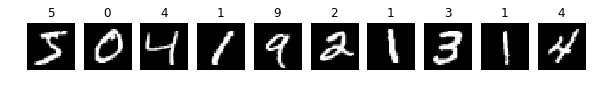

In [3]:
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.title(str(train_labels[i]))
    plt.imshow(train_images[i].reshape((image_size, image_size)))
    plt.axis('off')

In [4]:
def lr_loss(w, X, y, l2):
    loss = np.sum(np.logaddexp(0, -y*X.dot(w))) + l2*np.sum(w ** 2.)
    grad = -np.sum((special.expit(-y*X.dot(w))*y)[:,np.newaxis]*X, axis=0) + 2.*l2*w
    return (loss, grad)

X = validation_images / 256.
y = (validation_labels == 5) * 2. - 1
w = np.random.randn(image_size * image_size)
l2 = 1e-3
(loss0, grad0) = lr_loss(w, X, y, l2)
for i in range(10):
    index = np.random.randint(0, w.shape[0])

    old = w[index]
    w[index] = old + 1e-6
    (loss1, grad1) = lr_loss(w, X, y, l2)

    w[index] = old - 1e-6
    (loss2, grad2) = lr_loss(w, X, y, l2)

    w[index] = old

    num_grad = (loss1 - loss2)/2e-6

    rel_error = (num_grad - grad0[index]) / max(abs(num_grad), abs(grad0[index]), 1)
    
    print("in grad[%d], analytic = %f, numeric = %f, rel_error = %f" % (
        index, grad0[index], num_grad, rel_error))

    if np.abs(rel_error) > 1e-5:
        print("ERROR!")
        break

in grad[105], analytic = 0.152561, numeric = 0.152562, rel_error = 0.000001
in grad[383], analytic = 5.309311, numeric = 5.309311, rel_error = -0.000000
in grad[511], analytic = 2.893553, numeric = 2.893553, rel_error = -0.000000
in grad[62], analytic = -0.000376, numeric = -0.000375, rel_error = 0.000000
in grad[417], analytic = 0.046654, numeric = 0.046654, rel_error = -0.000001
in grad[615], analytic = 0.001242, numeric = 0.001242, rel_error = 0.000000
in grad[705], analytic = 0.023310, numeric = 0.023309, rel_error = -0.000001
in grad[642], analytic = -0.001484, numeric = -0.001483, rel_error = 0.000000
in grad[272], analytic = 5.080767, numeric = 5.080767, rel_error = -0.000000
in grad[691], analytic = 0.413164, numeric = 0.413164, rel_error = -0.000000


In [5]:
%%time

def lr_predict(w, X):
    return np.sign(2. * special.expit(X.dot(w)) - 1)

X = train_images / 256.
y = (train_labels > 5) * 2 - 1
X_val = validation_images / 256.
y_val = (validation_labels > 5) * 2. - 1
w = np.random.randn(image_size * image_size)
l2 = 1e-3
lr = 0.1

loss_history = []
accuracy_history = []

for i in range(20):
    (loss, grad) = lr_loss(w, X, y, l2)
    train_acc = np.mean((lr_predict(w, X) == y))
    val_acc = np.mean((lr_predict(w, X_val) == y_val))
    print("epoch %i: loss = %f, acc = %f, val_acc = %f" % (i, loss, train_acc, val_acc))
    
    loss_history.append(loss)
    accuracy_history.append([train_acc, val_acc])

    w -= grad * lr

epoch 0: loss = 34750.093814, acc = 0.441260, val_acc = 0.452100
epoch 1: loss = 33218.098531, acc = 0.600920, val_acc = 0.597300
epoch 2: loss = 32397.939759, acc = 0.602460, val_acc = 0.598600
epoch 3: loss = 31709.091641, acc = 0.629360, val_acc = 0.632600
epoch 4: loss = 31096.629919, acc = 0.673060, val_acc = 0.680300
epoch 5: loss = 30547.217058, acc = 0.702980, val_acc = 0.712400
epoch 6: loss = 30052.181260, acc = 0.721440, val_acc = 0.726900
epoch 7: loss = 29604.307741, acc = 0.731620, val_acc = 0.735900
epoch 8: loss = 29197.434527, acc = 0.738080, val_acc = 0.741300
epoch 9: loss = 28826.293635, acc = 0.743740, val_acc = 0.745600
epoch 10: loss = 28486.382852, acc = 0.748580, val_acc = 0.748400
epoch 11: loss = 28173.852684, acc = 0.752640, val_acc = 0.752000
epoch 12: loss = 27885.407833, acc = 0.756760, val_acc = 0.757000
epoch 13: loss = 27618.222523, acc = 0.759780, val_acc = 0.757700
epoch 14: loss = 27369.868429, acc = 0.762480, val_acc = 0.761300
epoch 15: loss = 271

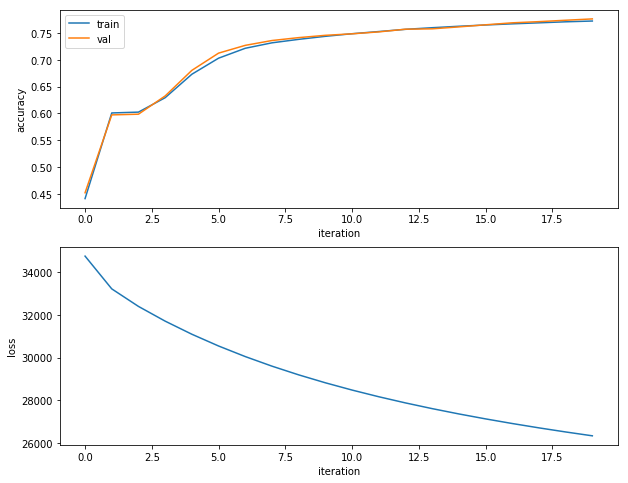

In [6]:
plt.subplot(2, 1, 1)
plt.plot([x[0] for x in accuracy_history], label = "train")
plt.plot([x[1] for x in accuracy_history], label = "val")
plt.legend()
plt.xlabel('iteration')
plt.ylabel('accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss_history)
plt.xlabel('iteration')
plt.ylabel('loss');

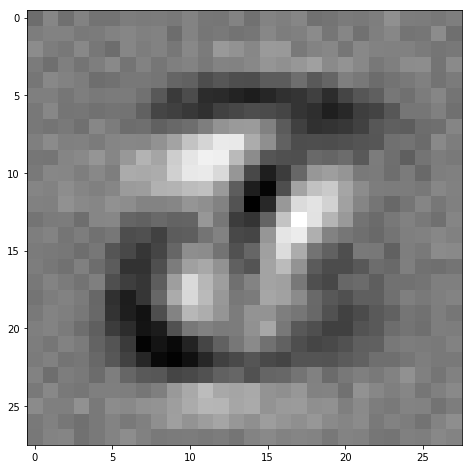

In [7]:
plt.imshow(w.reshape(image_size, image_size))